In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_categories.csv")
cities = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_cities.csv")
countries = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_countries.csv")
customers = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_customers.csv")
employees = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_employees.csv")
products = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_products.csv")
sales = pd.read_csv(r"D:\Data analysis\Python_Projects\Python_cleaning_Projects\Python_C_3_Grocery_Sales\cleaned_sales.csv")

Question1. How has total monthly revenue changed over time? 

In [ ]:
if sales['TotalPrice'].isnull().all():
    sales.drop(columns='TotalPrice', inplace=True)

df_sales = sales.merge(products[['ProductID', 'Price']], on='ProductID', how='left')
df_sales['TotalPrice'] = df_sales['Quantity'] * df_sales['Price'] * (1 - df_sales['Discount'])
df_sales['TotalPrice'] = df_sales['TotalPrice'].fillna(0)

In [ ]:
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'])
df_sales.set_index('SalesDate', inplace=True)
monthly_revenue = df_sales['TotalPrice'].resample('M').sum()
monthly_revenue = monthly_revenue.reset_index()

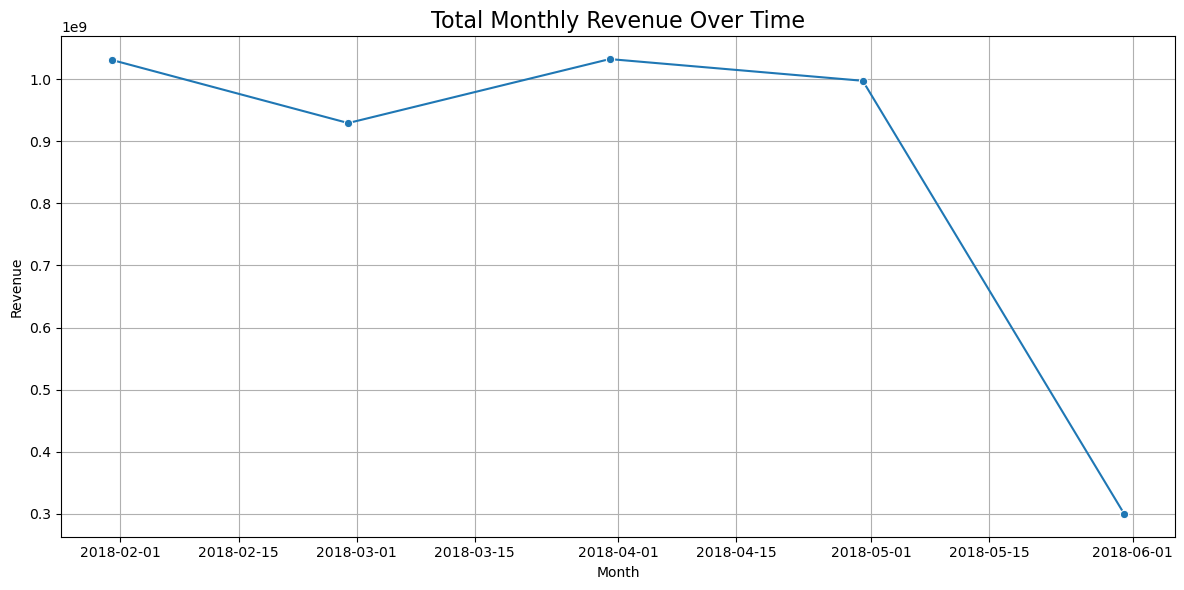

In [5]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x='SalesDate', y='TotalPrice', marker='o')
plt.title('Total Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

Question2. Which days of the week bring the highest average sales?

In [ ]:
df_sales = df_sales.reset_index()
df_sales['DayOfWeek'] = df_sales['SalesDate'].dt.day_name()
avg_sales_by_day = df_sales.groupby('DayOfWeek')['TotalPrice'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

avg_sales_by_day

DayOfWeek
Monday       641.454685
Tuesday      640.439033
Wednesday    641.209393
Thursday     640.605505
Friday       641.281059
Saturday     641.316323
Sunday       641.296517
Name: TotalPrice, dtype: float64

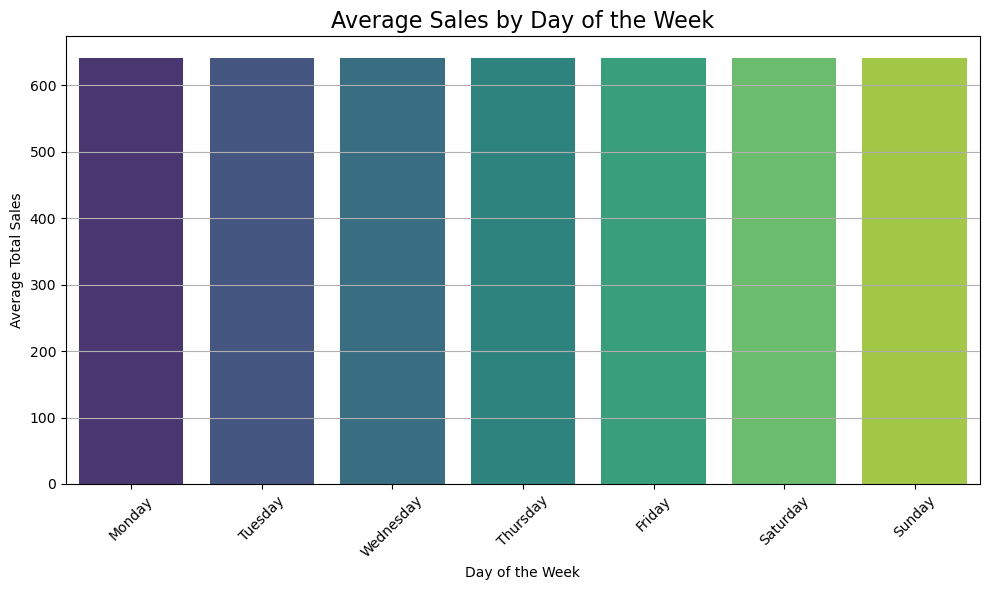

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_by_day.index, y=avg_sales_by_day.values, palette='viridis')
plt.title('Average Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Question3. What is the average order value (AOV) per transaction?

In [ ]:
total_revenue = df_sales['TotalPrice'].sum()
total_transactions = df_sales['SalesID'].nunique()
AOV = total_revenue / total_transactions

AOV

641.0721385087818

Question4.	Which product categories have the highest and lowest average total price per sale?

In [52]:
sales_product = pd.merge(df_sales, products[['ProductID', 'CategoryID']], on='ProductID', how='left')
sales_product_cat = pd.merge(sales_product, categories, on='CategoryID', how='left')
avg_price_per_category = sales_product_cat.groupby('CategoryName')['TotalPrice'].mean().reset_index(name='AvgTotalPrice')
avg_price_sorted = avg_price_per_category.sort_values(by='AvgTotalPrice', ascending=False)

print("Highest Avg Total Price per Sale:")
print(avg_price_sorted.head(1), "\n")
print("Lowest Avg Total Price per Sale:")
print(avg_price_sorted.tail(1))

Highest Avg Total Price per Sale:
  CategoryName  AvgTotalPrice
4        Grain     775.103031 

Lowest Avg Total Price per Sale:
  CategoryName  AvgTotalPrice
9   Shell fish     557.406693


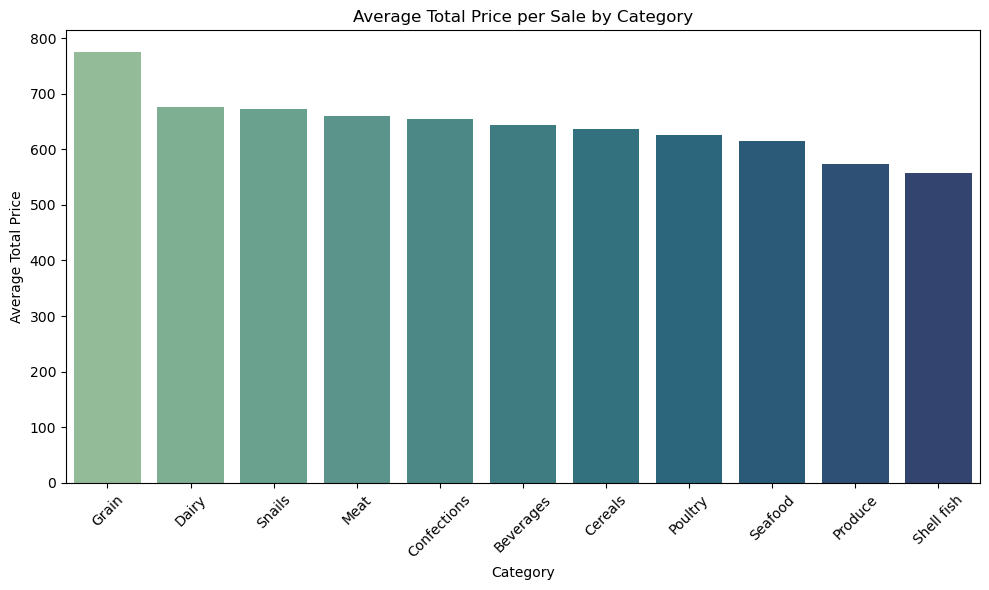

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_sorted, x='CategoryName', y='AvgTotalPrice', palette='crest')
plt.title('Average Total Price per Sale by Category')
plt.xlabel('Category')
plt.ylabel('Average Total Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question5.	What is the average discount given per category and how does it vary?

In [ ]:
sales_with_category = pd.merge(df_sales, products[['ProductID', 'CategoryID']], on='ProductID', how='left')
avg_discount_per_category = sales_with_category.groupby('CategoryID')['Discount'].mean().reset_index(name='AvgDiscount')
avg_discount_per_category = pd.merge(avg_discount_per_category, categories, on='CategoryID', how='left')

avg_discount_per_category = avg_discount_per_category.sort_values(by='AvgDiscount', ascending=False)
avg_discount_per_category

,CategoryID,AvgDiscount,CategoryName
4,5,0.030055,Beverages
6,7,0.030026,Meat
2,3,0.029997,Cereals
8,9,0.029996,Poultry
9,10,0.029977,Snails
10,11,0.029967,Produce
0,1,0.029954,Confections
7,8,0.029952,Grain
5,6,0.029933,Seafood
1,2,0.029884,Shell fish


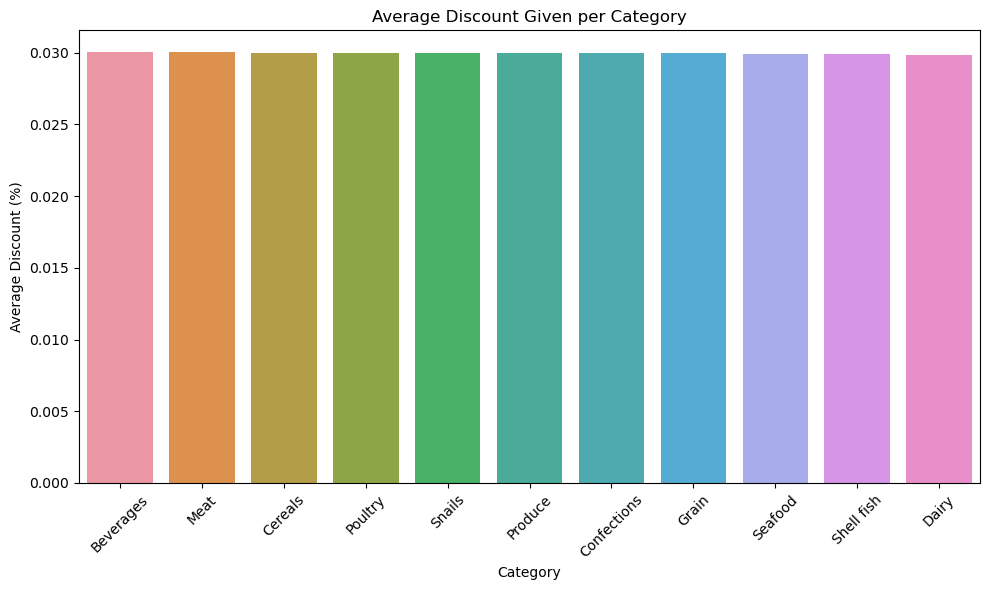

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_discount_per_category, x='CategoryName', y='AvgDiscount')
plt.title('Average Discount Given per Category')
plt.xlabel('Category')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question6.	How many customers made multiple purchases?

In [12]:
customer_purchase_count = df_sales.groupby('CustomerID')['SalesID'].count()
customers_multiple_purchases = customer_purchase_count[customer_purchase_count > 1]
num_customers_multiple_purchases = customers_multiple_purchases.count()

num_customers_multiple_purchases

98759

Question7.	What is the average number of products purchased per customer?

In [13]:
customer_product_count = df_sales.groupby('CustomerID')['ProductID'].nunique()
avg_products_per_customer = customer_product_count.mean()

avg_products_per_customer

63.51048512034346

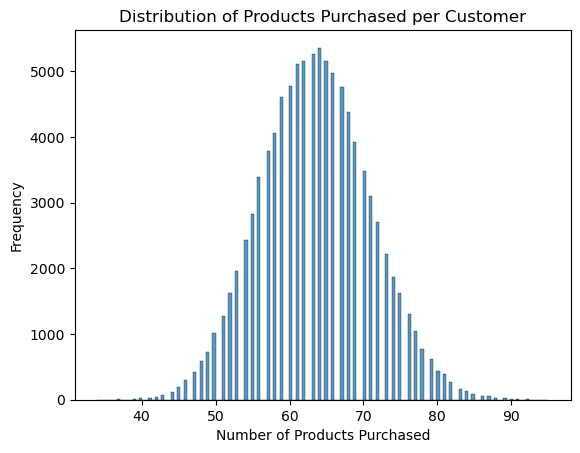

In [14]:
sns.histplot(customer_product_count)
plt.title('Distribution of Products Purchased per Customer')
plt.xlabel('Number of Products Purchased')
plt.ylabel('Frequency')
plt.show()

Question8.	Which cities have the highest average customer order value?

In [15]:
df_sales_with_city = df_sales.merge(customers[['CustomerID', 'CityID']], on='CustomerID', how='left')
df_sales_with_city = df_sales_with_city.merge(cities[['CityID', 'CityName']], on='CityID', how='left')
avg_order_value_per_city = df_sales_with_city.groupby('CityName')['TotalPrice'].mean()
sorted_avg_order_value = avg_order_value_per_city.sort_values(ascending=False)
top_10_avg_order_value = sorted_avg_order_value.head(10)

top_10_avg_order_value

CityName
Jackson         667.514262
Arlington       660.854963
Albuquerque     658.653694
Lubbock         658.387643
San Antonio     658.171325
New York        657.764146
Jacksonville    657.418347
Rochester       656.827058
Greensboro      656.710260
Cleveland       656.558020
Name: TotalPrice, dtype: float64

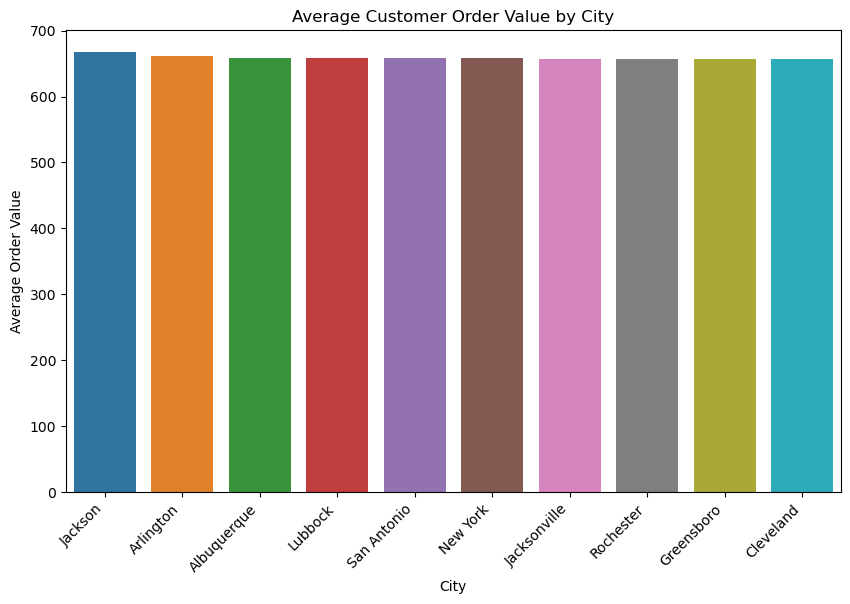

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_avg_order_value.index, y=top_10_avg_order_value.values)
plt.title('Average Customer Order Value by City')
plt.xlabel('City')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.show()

Question9.	What is the total revenue generated by each customer?

In [17]:
df_total_price_Per_Customer = df_sales.groupby('CustomerID')['TotalPrice'].sum()
top10_customers_by_purchase = df_total_price_Per_Customer.sort_values(ascending=False).head(10)
top10_customers_by_purchase

CustomerID
94800    130324.15896
95972    123004.86425
97863    121922.59325
95048    121883.95250
95157    120849.77850
94138    119853.83904
97813    119418.64575
96775    119180.30250
95971    118687.73975
95868    118624.58450
Name: TotalPrice, dtype: float64

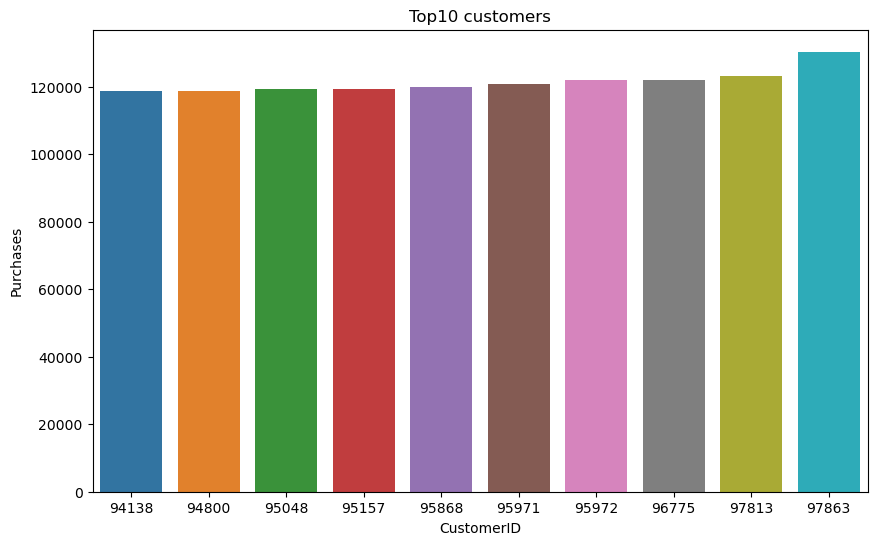

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x= top10_customers_by_purchase.index.sort_values(ascending=False), y= top10_customers_by_purchase.values)
plt.xlabel('CustomerID')
plt.ylabel('Purchases')
plt.title('Top10 customers')
plt.show()

Question10.	What is the distribution of product vitality days — and do short-lifespan products sell better?

In [ ]:
product_sales = df_sales.groupby('ProductID')['Quantity'].sum().reset_index(name='TotalQuantitySold')
product_vitality_sales = pd.merge(products[['ProductID', 'VitalityDays']], product_sales, on='ProductID', how='left').fillna(0)

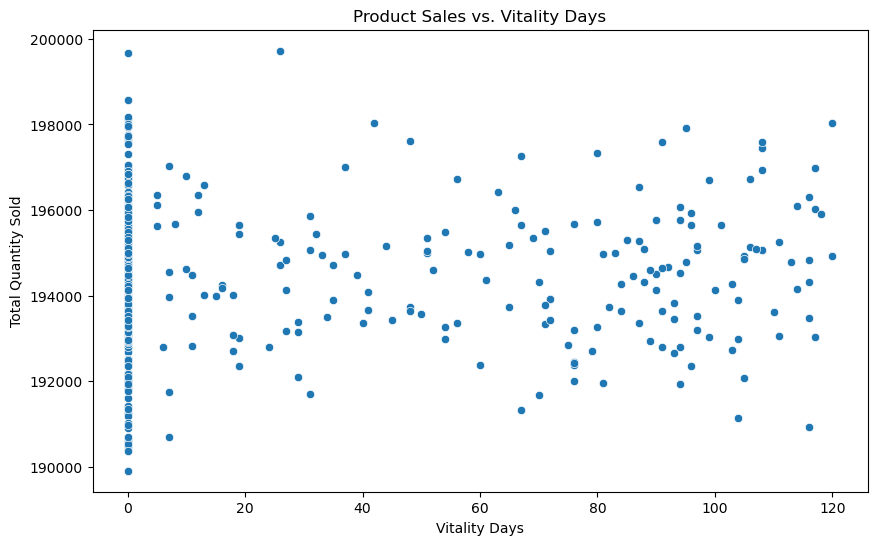

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_vitality_sales, x='VitalityDays', y='TotalQuantitySold')
plt.title('Product Sales vs. Vitality Days')
plt.xlabel('Vitality Days')
plt.ylabel('Total Quantity Sold')
plt.show()

Question11.	What percentage of total revenue comes from the top 5 products?

In [ ]:
product_revenue = df_sales.groupby('ProductID')['TotalPrice'].sum().reset_index(name='TotalRevenue')
top5 = product_revenue.sort_values(by='TotalRevenue', ascending=False).head(5)
total_revenue = product_revenue['TotalRevenue'].sum()
top5_revenue = top5['TotalRevenue'].sum()

top5_percentage = (top5_revenue / total_revenue) * 100
top5_products = pd.merge(top5, products[['ProductID', 'ProductName']], on='ProductID', how='left')
top5_products 

,ProductID,TotalRevenue,ProductName
0,345,1.886884e+07,Bread - Calabrese Baguette
1,98,1.872194e+07,Shrimp - 31/40
2,392,1.870348e+07,Puree - Passion Fruit
3,104,1.868512e+07,Tia Maria
4,149,1.855166e+07,Zucchini - Yellow


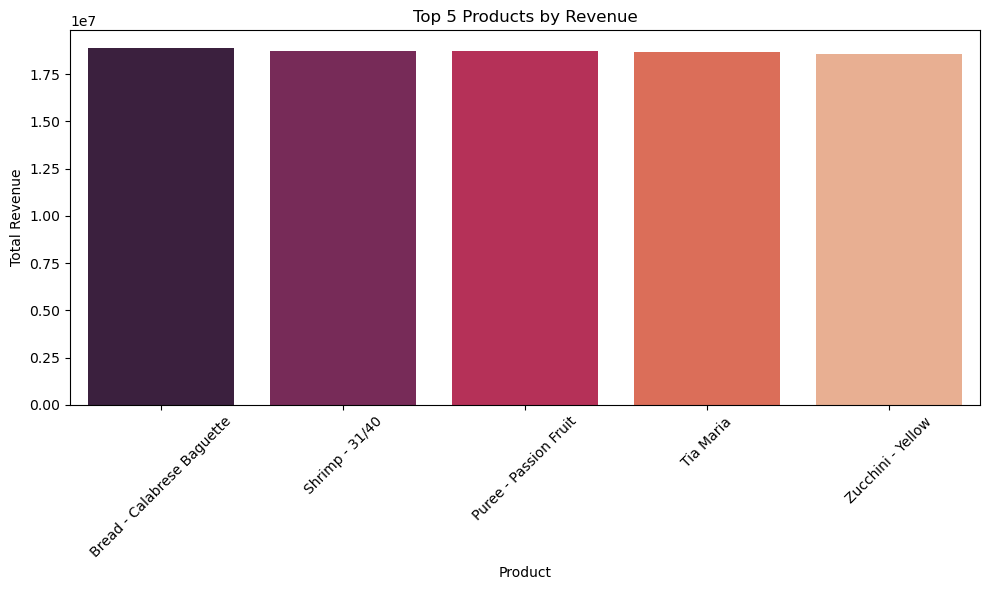

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top5_products, x='ProductName', y='TotalRevenue', palette='rocket')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question12. Which employees have the highest average revenue per sale?

In [19]:
total_revenue_per_employee = df_sales.groupby('SalesPersonID')['TotalPrice'].sum()
sales_count_per_employee = df_sales.groupby('SalesPersonID')['SalesID'].count()
avg_revenue_per_sale = total_revenue_per_employee / sales_count_per_employee
avg_revenue_per_sale_sorted = avg_revenue_per_sale.sort_values(ascending=False)

avg_revenue_per_sale_sorted.head(10)

SalesPersonID
20    645.223620
13    644.952568
21    644.249818
5     644.247525
22    643.811790
12    643.433179
14    642.992149
7     642.232055
6     642.184272
4     641.695717
dtype: float64

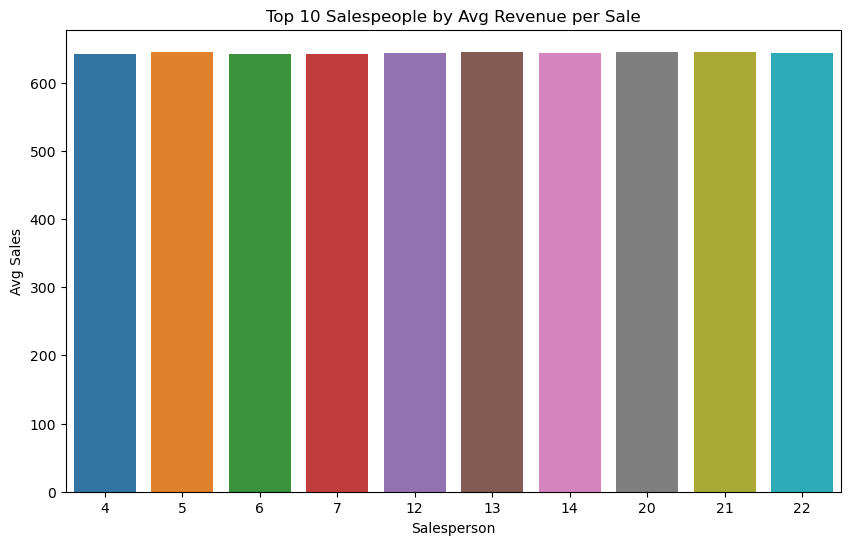

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_revenue_per_sale_sorted.head(10).index, y=avg_revenue_per_sale_sorted.head(10).values)
plt.xlabel('Salesperson')
plt.ylabel('Avg Sales')
plt.title('Top 10 Salespeople by Avg Revenue per Sale')
plt.show()

Question13.	How long has each employee been with the company, and how does that relate to their sales count?

In [ ]:
employees['HireDate'] = pd.to_datetime(employees['HireDate'])
employees['Tenure'] = (pd.to_datetime('today') - employees['HireDate']).dt.days / 365
sales_count_per_employee = df_sales.groupby('SalesPersonID')['SalesID'].count()

df_employees_sales = pd.DataFrame({
    'EmployeeID': employees['EmployeeID'],
    'Tenure': employees['Tenure']})
df_employees_sales['SalesCount'] = df_employees_sales['EmployeeID'].map(sales_count_per_employee)

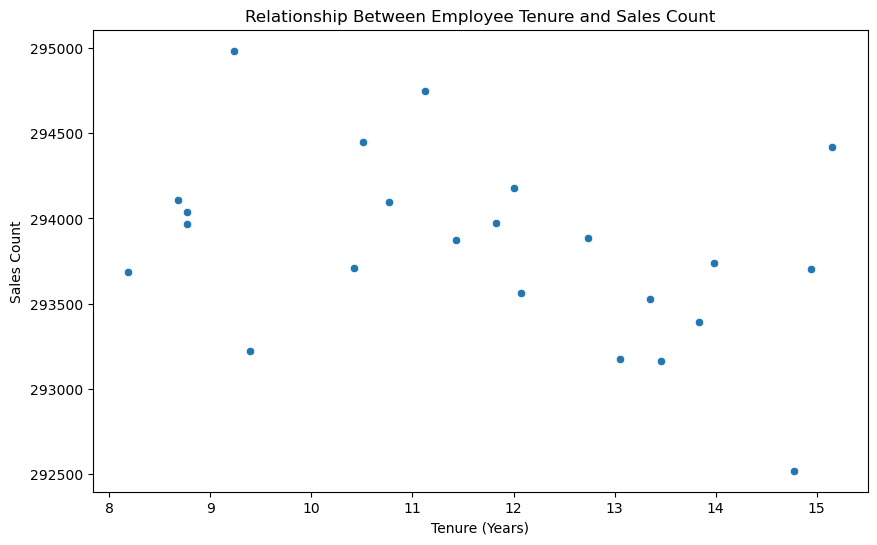

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='SalesCount', data=df_employees_sales)
plt.xlabel('Tenure (Years)')
plt.ylabel('Sales Count')
plt.title('Relationship Between Employee Tenure and Sales Count')
plt.show()

Question14.	Are some employees selling more discounted items than others?

In [ ]:
df_sales['Discounted'] = df_sales['Discount'] > 0
discounted_sales_per_employee = df_sales.groupby('SalesPersonID')['Discounted'].sum()
df_employees_discounted_sales = pd.DataFrame({
    'EmployeeID': discounted_sales_per_employee.index,
    'DiscountedSalesCount': discounted_sales_per_employee.values})

df_employees_discounted_sales = df_employees_discounted_sales.merge(employees[['EmployeeID', 'FirstName', 'LastName']], on='EmployeeID')

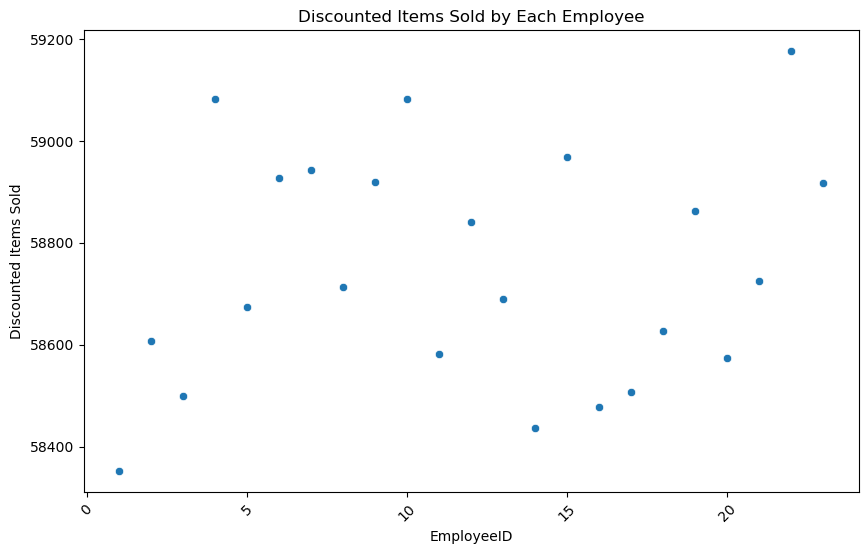

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EmployeeID', y='DiscountedSalesCount', data=df_employees_discounted_sales)
plt.xlabel('EmployeeID')
plt.ylabel('Discounted Items Sold')
plt.title('Discounted Items Sold by Each Employee')
plt.xticks(rotation=45)
plt.show()

Question15. What is the average time between purchases per customer (for repeat buyers)?

In [ ]:
df_sales['SalesDate'] = pd.to_datetime(df_sales['SalesDate'])
df_sales_sorted = df_sales.sort_values(by=['CustomerID', 'SalesDate'])
df_sales_sorted['TimeDifference'] = df_sales_sorted.groupby('CustomerID')['SalesDate'].diff()
avg_time_between_purchases = df_sales_sorted.groupby('CustomerID')['TimeDifference'].mean().reset_index(name='AvgTimeBetweenPurchases')

print(avg_time_between_purchases)

       CustomerID   AvgTimeBetweenPurchases
0               1 1 days 23:41:31.630483870
1               2 1 days 23:48:56.079838709
2               3 1 days 20:27:48.533043478
3               4 1 days 20:16:42.896029411
4               5 2 days 04:36:09.429655172
...           ...                       ...
98754       98755 1 days 15:13:45.559041095
98755       98756 1 days 13:47:17.183580246
98756       98757 2 days 00:22:08.638666666
98757       98758 2 days 01:02:30.955161290
98758       98759 2 days 06:47:10.008035714

[98759 rows x 2 columns]


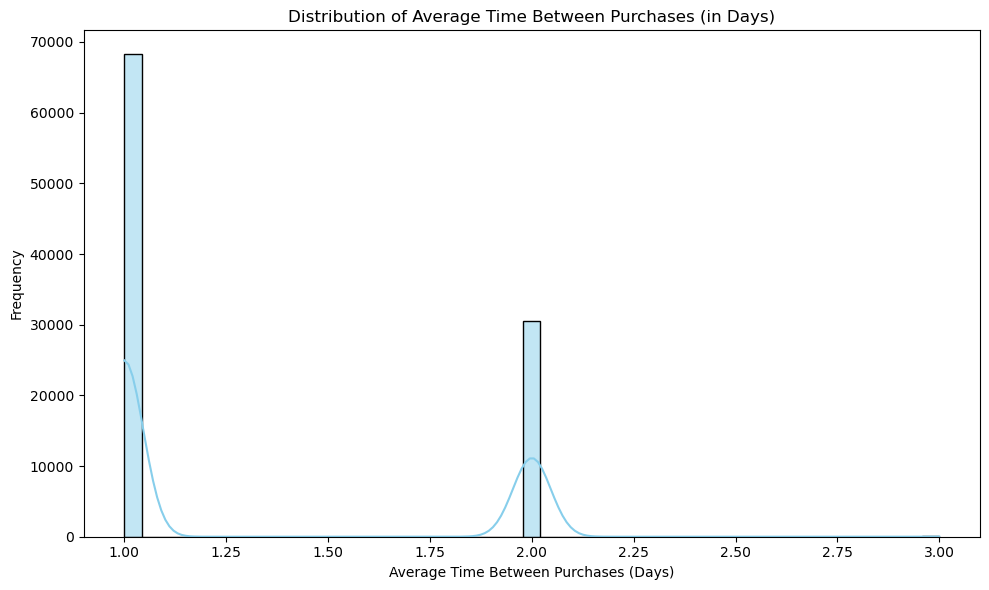

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(avg_time_between_purchases['AvgTimeBetweenPurchases'].dt.days, kde=True, color='skyblue')
plt.title('Distribution of Average Time Between Purchases (in Days)')
plt.xlabel('Average day Between Purchases')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()